## Learning Goals for Lab 04
Functions and Visualization
- Functions
    - customize Python
    - syntax
        - def
        - return
     - arguments
     - local variables
- Visualization
    - datascience Table
        - plot
        - scatter
        - hist
     - arrays
         - from data columns
         - matplotlib
         - plotly

# Functions
Thousands of functions are built into the Python computer language and still others can be loaded by using the `import` Python command. This is very powerful and provides almost limitless capability to the Python language. However, there are many times when a custom function may be needed and this is a very powerful way to automate repetitive data handling and analysis tasks in a reproducible manner. Functions take arguments given in paretheses *()* directly following the name. For instance below is the built-in Python print function:

In [ ]:
dogname = "Phineas" # Define `dogname` variable
print(dogname)      # `dogname` is the argument for the function, print

Now let's give this a try by learning how to write our own functions.

In [ ]:
def double(xtra):
    """ Doubles my first function """
    return 2*xtra

In [ ]:
def triple(x):
    """ triples """
    return 2*x

In [ ]:
x=triple(6)*double(2)
x

In [ ]:
double(x)

In [ ]:
type(double)

In [ ]:
?double

In [ ]:
double(10)

## Defining functions

Here is a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):
```
    def
```

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
```
    
    def to_percentage
```
##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.
```
    def to_percentage(proportion)
```

We put a colon after the signature to tell Python it's over.
```

    def to_percentage(proportion):
```

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:
```
    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
```
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.
```
    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
```

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:
```
    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
```

In [1]:
def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

In [2]:
print(to_percentage(0.45),"%")

45.0 %


#### For [unicode emojis](https://unicode.org/emoji/charts-14.0/full-emoji-list.html)
(https://unicode.org/emoji/charts-14.0/full-emoji-list.html)[https://unicode.org/emoji/charts-14.0/full-emoji-list.html]

In [ ]:
# CLDR
print("\N{grinning face with smiling eyes}")

In [ ]:
import numpy as np
def happy_print(n):
    """ Prints happy n times """
    for i in np.arange(n):
        # print(i+1)
        print(i+1,"\N{grinning face with smiling eyes}")
    return n 

In [ ]:
happy_print(60)

#### Now try more complex function

In [4]:
import numpy as np
# Compute the ratio as a percentage

def per_change(x,y):
    """ Takes ratio of x to y and
    converts to a % change by subtracting 1
     >>> per_change(20, 16)
    0.2500
    
    """
    return np.round(x/y-1,2)

In [8]:
print(f'{per_change(3.89,3.69):.2f}')

0.05


#### Now use apply to compute new Table column

In [3]:
from datascience import *
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
full_census_table = Table.read_table(data)
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table = partial_census_table.relabeled('SEX', 'GENDER').relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020')
partial_census_table

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [10]:
census_perchange = partial_census_table.with_columns('% change', per_change(partial_census_table.column('2020'),partial_census_table.column('2010')))

In [11]:
census_perchange

GENDER,AGE,2010,2020,% change
0,0,3951495,3735010,-0.05
0,1,3957904,3773884,-0.05
0,2,4090799,3853025,-0.06
0,3,4111869,3921526,-0.05
0,4,4077511,4017847,-0.01
0,5,4064653,4054336,-0
0,6,4073031,4040169,-0.01
0,7,4043100,4029753,-0
0,8,4025624,4034785,0
0,9,4125413,4078668,-0.01


In [13]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
len(census_perchange)

5

In [22]:
.8*census_perchange.num_rows

244.8

In [24]:
census_perchange.split(244)

(GENDER | AGE  | 2010    | 2020    | % change
 1      | 43   | 2030710 | 1967767 | -0.03
 1      | 29   | 2112185 | 2458730 | 0.16
 2      | 32   | 1981289 | 2228352 | 0.12
 0      | 44   | 4177954 | 3846684 | -0.08
 1      | 57   | 1909846 | 2104702 | 0.1
 1      | 63   | 1753818 | 1960712 | 0.12
 1      | 44   | 2074290 | 1907940 | -0.08
 2      | 4    | 1993216 | 1964865 | -0.01
 1      | 72   | 862491  | 1398098 | 0.62
 1      | 81   | 496003  | 604941  | 0.22
 ... (234 rows omitted),
 GENDER | AGE  | 2010    | 2020    | % change
 1      | 1    | 2020320 | 1926654 | -0.05
 0      | 12   | 4113297 | 4200977 | 0.02
 2      | 20   | 2236473 | 2123140 | -0.05
 2      | 83   | 658356  | 676482  | 0.03
 0      | 49   | 4598599 | 4265569 | -0.07
 2      | 16   | 2098173 | 2051722 | -0.02
 1      | 20   | 2331674 | 2221432 | -0.05
 0      | 15   | 4230914 | 4175920 | -0.01
 2      | 68   | 1254057 | 1813435 | 0.45
 2      | 14   | 2022654 | 2047865 | 0.01
 ... (52 rows omitted))

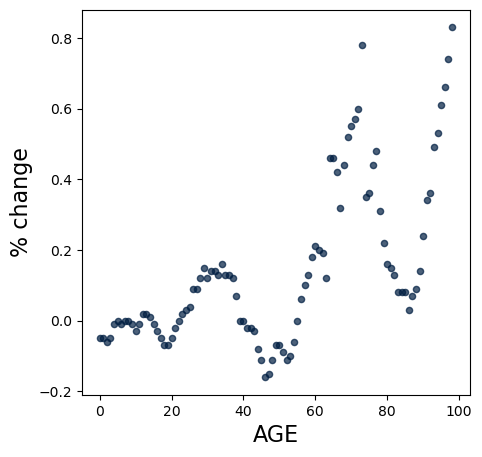

In [19]:
census_perchange.where('AGE',are.below(99)).where('GENDER',0).scatter('AGE','% change')

In [ ]:
census=partial_census_table.where(0,0).where('AGE',are.below(99))
census=census.with_columns(
    "% change",census.apply(per_change,'2020','2010')
)
census.set_format('% change',PercentFormatter)

Need to import these to plot

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

In [ ]:
census.select('AGE','% change').plot('AGE')

Select proper columns

In [ ]:
census.select('AGE','2010','2020').plot('AGE')

### scatter depicts relationship between two variables

In [ ]:
census.scatter('2010','2020')

In [ ]:
import plotly.express as px

series1 = census.column('2010')
age = census.column('AGE')
fig = px.line(x=age, y=[series1])

fig.show()

In [ ]:
census.hist('% change')